In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
salary = pd.read_csv("Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


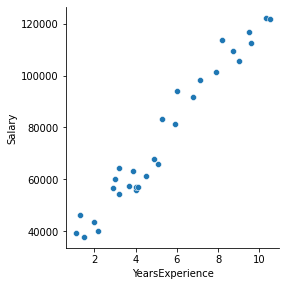

In [5]:
sns.pairplot(salary,x_vars = "YearsExperience", y_vars = "Salary", size=4, aspect = 1, kind= "scatter")
plt.show()

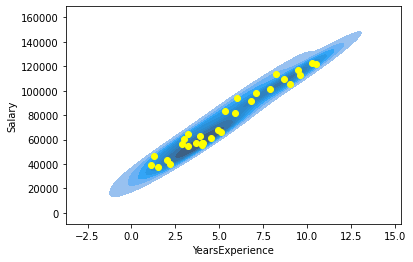

In [6]:
sns.kdeplot(salary.YearsExperience, salary.Salary ,shade= True, shade_lowest= False)
plt.scatter(salary.YearsExperience, salary.Salary, color = "yellow")

# Performing Linear Regression

In [7]:
x = salary["YearsExperience"]
y = salary["Salary"]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.7, test_size = 0.3, random_state = 100)


In [9]:
x_train.head()

17     5.3
22     7.9
11     4.0
4      2.2
29    10.5
Name: YearsExperience, dtype: float64

In [10]:
y_train.head()

17     83088
22    101302
11     55794
4      39891
29    121872
Name: Salary, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
x_train_lm, x_test_lm, y_train_lm, y_test_lm = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [12]:
x_train_lm.shape

(21,)

In [13]:
x_train_lm = x_train_lm.values.reshape(-1,1)
x_test_lm = x_test_lm.values.reshape(-1,1)

In [14]:
print(x_train_lm.shape)
print(y_train_lm.shape)
print(x_test_lm.shape)
print(y_test_lm.shape)

(21, 1)
(21,)
(9, 1)
(9,)


In [15]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(x_train_lm, y_train_lm)

LinearRegression()

In [17]:
print(lm.intercept_)
print(lm.coef_)

25202.887786154883
[9731.20383825]


In [19]:
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [21]:
# Predicting salary on some random Experiences
X=np.array([3,1.5])
y=X.reshape(-1,1)
y_pred = lm.predict(y)
y_pred

array([54396.49930089, 39799.69354352])

In [23]:
y_pred_test = lm.predict(x_test_lm)

In [24]:
y_test = np.array(y_test_lm)
y1 = y_test.reshape(-1,1)

In [25]:
y_pred = np.array(y_pred_test)
yp = y_pred.reshape(-1,1)
result = np.hstack((y1,yp))
salary_pred = pd.DataFrame(result,columns=["Test Result", "Pred result"])
display(salary_pred)

,Test Result,Pred result
0,57189.0,61208.341988
1,116969.0,117649.324249
2,122391.0,125434.287320
3,57081.0,65100.823523
4,56642.0,53423.378917
5,56957.0,64127.703139
6,112635.0,118622.444633
7,105582.0,112783.722330
8,60150.0,54396.499301
